In [53]:
import pandas as pd
import seaborn as sns
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from scipy import signal
from datetime import datetime, timedelta

In [4]:
cpi = pd.read_csv('cpi.csv')
print(len(cpi))
cpi.head()

920


,DATE,CPI
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [5]:
unrate = pd.read_csv('unrate.csv')
print(len(unrate))
unrate.head()

908


,DATE,UNEMPLOYMENT
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [6]:
effr = pd.read_csv('effr.csv')
print(len(effr))
effr.head()

830


,DATE,EFFR
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [7]:
inflation = pd.read_csv('inflation.csv')
print(len(inflation))
inflation.head()

63


,DATE,INFLATION
0,1960-01-01,1.46
1,1961-01-01,1.07
2,1962-01-01,1.20
3,1963-01-01,1.24
4,1964-01-01,1.28


In [10]:
merged = unrate.merge(inflation, on='DATE')
merged = merged.merge(effr, on='DATE')

unrate_col = merged.pop('UNEMPLOYMENT')
effr_col = merged.pop('EFFR')

merged['UNEMPLOYMENT'] = unrate_col
merged['EFFR'] = effr_col

#merged.dropna(inplace=True)
print(len(merged))
merged.head()

63


,DATE,INFLATION,UNEMPLOYMENT,EFFR
0,1960-01-01,1.46,5.2,3.99
1,1961-01-01,1.07,6.6,1.45
2,1962-01-01,1.20,5.8,2.15
3,1963-01-01,1.24,5.7,2.92
4,1964-01-01,1.28,5.6,3.48


In [12]:
merged['INFLATION_LAG_12M'] = merged['INFLATION'].shift(1)
merged['UNEMPLOYMENT_LAG_12M'] = merged['UNEMPLOYMENT'].shift(1)
merged.head()

,DATE,INFLATION,UNEMPLOYMENT,EFFR,CPI_LAG_12M,UNEMPLOYMENT_LAG_12M,INFLATION_LAG_12M
0,1960-01-01,1.46,5.2,3.99,NaN,NaN,NaN
1,1961-01-01,1.07,6.6,1.45,1.46,5.2,1.46
2,1962-01-01,1.20,5.8,2.15,1.07,6.6,1.07
3,1963-01-01,1.24,5.7,2.92,1.20,5.8,1.20
4,1964-01-01,1.28,5.6,3.48,1.24,5.7,1.24


In [13]:
merged2 = merged[merged['EFFR'] > 1.0]
merged2

,DATE,INFLATION,UNEMPLOYMENT,EFFR,CPI_LAG_12M,UNEMPLOYMENT_LAG_12M,INFLATION_LAG_12M
0,1960-01-01,1.46,5.2,3.99,NaN,NaN,NaN
1,1961-01-01,1.07,6.6,1.45,1.46,5.2,1.46
2,1962-01-01,1.20,5.8,2.15,1.07,6.6,1.07
3,1963-01-01,1.24,5.7,2.92,1.20,5.8,1.20
4,1964-01-01,1.28,5.6,3.48,1.24,5.7,1.24
5,1965-01-01,1.59,4.9,3.90,1.28,5.6,1.28
6,1966-01-01,3.02,4.0,4.42,1.59,4.9,1.59
7,1967-01-01,2.77,3.9,4.94,3.02,4.0,3.02
8,1968-01-01,4.27,3.7,4.61,2.77,3.9,2.77
9,1969-01-01,5.46,3.4,6.30,4.27,3.7,4.27


                             OLS Regression Results                             
Dep. Variable:     UNEMPLOYMENT_LAG_12M   R-squared:                       0.082
Model:                              OLS   Adj. R-squared:                  0.063
Method:                   Least Squares   F-statistic:                     4.311
Date:                  Fri, 15 Sep 2023   Prob (F-statistic):             0.0432
Time:                          16:02:01   Log-Likelihood:                -87.014
No. Observations:                    50   AIC:                             178.0
Df Residuals:                        48   BIC:                             181.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0584      0.392

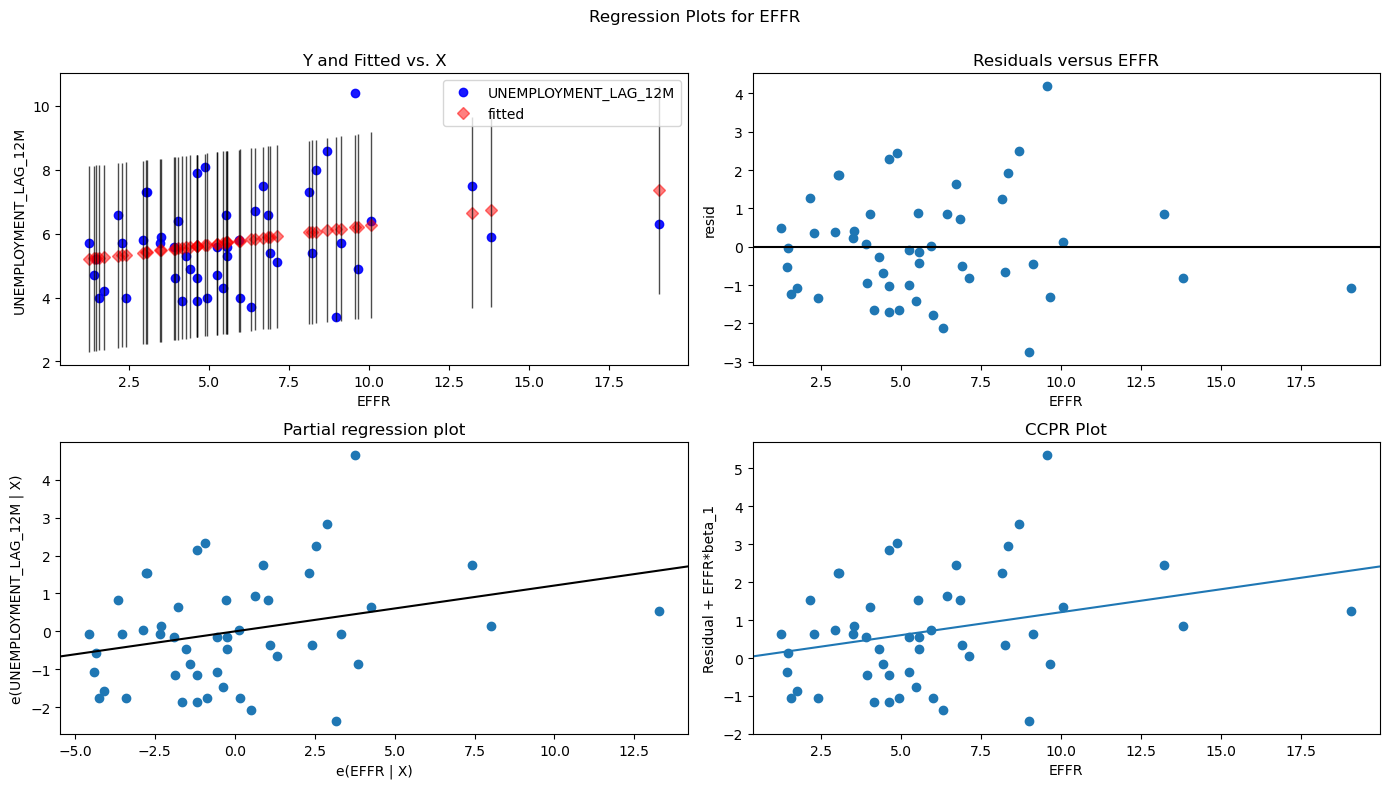

In [54]:
# fit simple linear regression model
mod = ols('UNEMPLOYMENT_LAG_12M ~ EFFR',
                   data=merged2).fit()
  
# display model summary
print(mod.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(mod,
                                    'EFFR',
                                    fig=fig)

                            OLS Regression Results                            
Dep. Variable:      INFLATION_LAG_12M   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     71.48
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           4.57e-11
Time:                        16:02:52   Log-Likelihood:                -99.652
No. Observations:                  50   AIC:                             203.3
Df Residuals:                      48   BIC:                             207.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4448      0.505      0.881      0.3

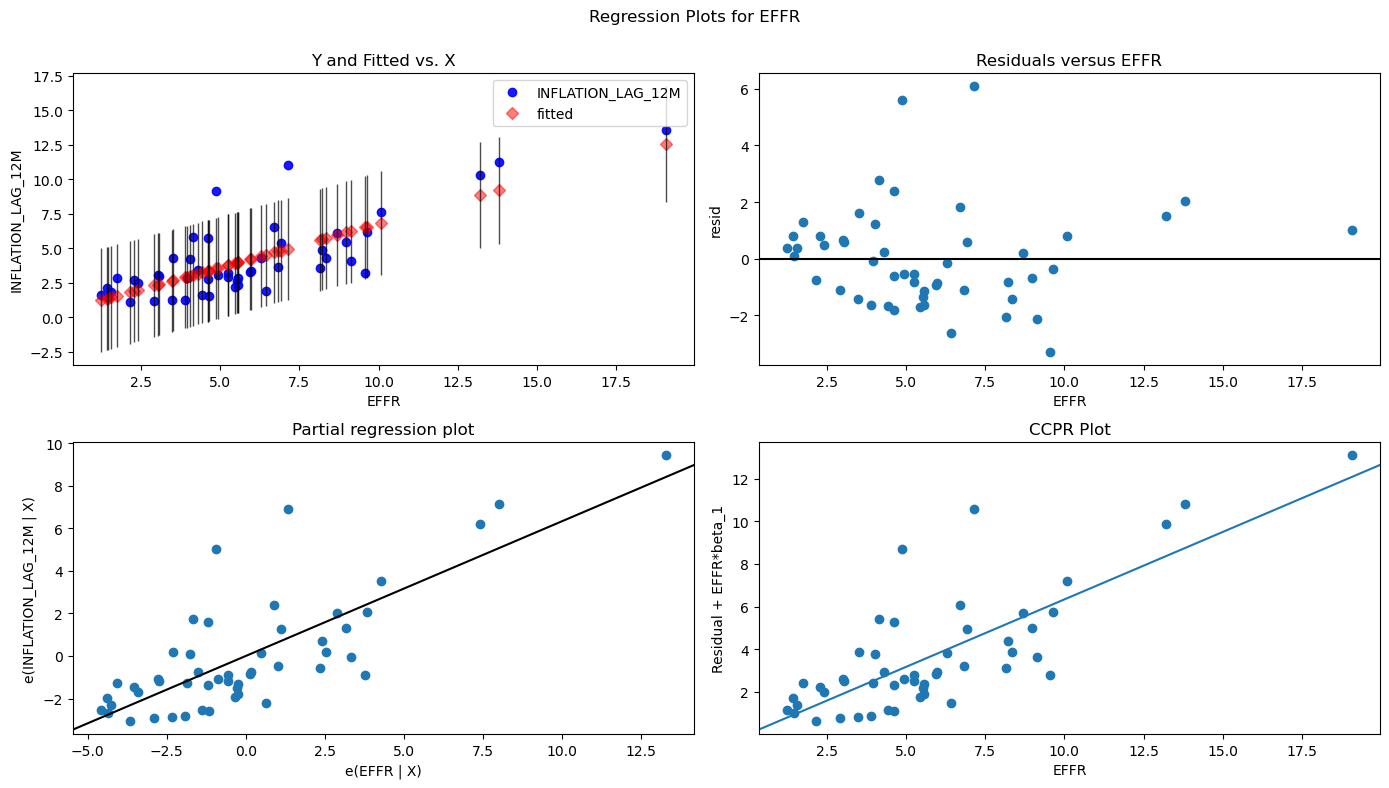

In [57]:
# fit simple linear regression model
mod = ols('INFLATION_LAG_12M ~ EFFR',
                   data=merged2).fit()
  
# display model summary
print(mod.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(mod,
                                    'EFFR',
                                    fig=fig)

In [10]:
# merged2 = pd.melt(merged, id_vars=['DATE'], var_name=['SIGNAL'], value_name='VALUE', ignore_index = False)
# merged2.sort_values(by=['DATE'], inplace=True)
# merged2.reset_index(drop=True, inplace=True)
# print(len(merged2))
# merged2.tail(n=10)

In [16]:
x = merged['EFFR']
y = merged['INFLATION']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

1

In [17]:
x = merged['EFFR']
y = merged['UNEMPLOYMENT']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

-2

In [18]:
x = merged['INFLATION']
y = merged['UNEMPLOYMENT']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

-3

In [19]:
import numpy as np
from scipy import signal
rng = np.random.default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(100), x])
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
lag

-100

In [20]:
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_effr_cpi = ccf_values(merged['EFFR'], merged['INFLATION'])

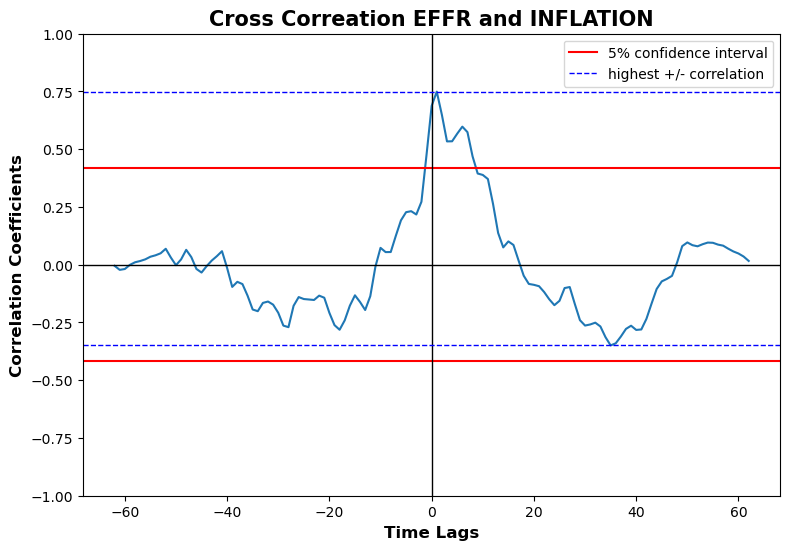

In [55]:
lags = signal.correlation_lags(len(merged['EFFR']), len(merged['INFLATION']))
def ccf_plot(lags, ccf):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation EFFR and INFLATION', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', 
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_effr_cpi)

In [37]:
import numpy as np

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool, BoxAnnotation, Label
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, curdoc

output_notebook()
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

dates = np.array(merged['DATE'], dtype=np.datetime64)

Loading BokehJS ...

In [31]:
# For instance, the average CPI inflation rate was 3.56 percent from 1948 to 1978, and 3.74 percent 
# from 1979 (when the Fed first had a formal price stability mandate) to 2013. And from 2021 to 2023
# it has been above the mandate.

In [32]:
#effr_chg_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR_PERCENT_CHG']))
effr_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR']))
#cpi_src = ColumnDataSource(data=dict(date=dates, rate=merged['CPI_PERCENT']))
unemp_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT']))
unemp_lag_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT_LAG_12M']))

p = figure(title='EFFR vs Unemployment', height=300, sizing_mode='stretch_width', tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], dates[len(dates) - 1]))
           #background_fill_color="#efefef", x_range=(dates[0], dates[100]),)

#p.line('date', 'rate', source=effr_chg_src, color='#3195ce', legend_label='EFFR % (1-month change)')
p.line('date', 'rate', source=effr_src, color='#56B4E9', legend_label='Federal Funds')
#p.line('date', 'rate', source=cpi_src, color='#E69F00', legend_label='Inflation (12-month % change)')
p.line('date', 'rate', source=unemp_src, color='#E69F00', legend_label='Unemployment')
#p.line('date', 'rate', source=unemp_lag_src, color='#009E73', legend_label='Lagged Unemployment (12 Months)')
# p.line('date', 'rate', source=unemp_src, color='#009E73', legend_label='Unemployment')
p.yaxis.axis_label = 'Rate'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                toolbar_location=None)

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "white"
range_tool.overlay.fill_alpha = 0.2

#select.line('date', 'rate', source=effr_chg_src, color='#3195ce')
select.line('date', 'rate', source=effr_src, color='#56B4E9')
# select.line('date', 'rate', source=effr_src, color='#56B4E9')
#select.line('date', 'rate', source=cpi_src, color='#E69F00')
select.line('date', 'rate', source=unemp_src, color='#E69F00')
#select.line('date', 'rate', source=unemp_lag_src, color='#009E73')

select.ygrid.grid_line_color = None
select.add_tools(range_tool)


show(column(p, select))

In [33]:
effr_src = ColumnDataSource(data=dict(date=dates, rate=merged['EFFR']))
cpi_src = ColumnDataSource(data=dict(date=dates, rate=merged['INFLATION']))

p = figure(title='EFFR vs INFLATION', height=300, sizing_mode='stretch_width', tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], dates[len(dates) - 1]),)

p.line('date', 'rate', source=effr_src, color='#56B4E9', legend_label='Federal Funds')
p.line('date', 'rate', source=cpi_src, color='#E69F00', legend_label='INFLATION')
p.yaxis.axis_label = 'Rate'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                toolbar_location=None)

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "white"
range_tool.overlay.fill_alpha = 0.2

select.line('date', 'rate', source=effr_src, color='#56B4E9')
select.line('date', 'rate', source=cpi_src, color='#E69F00')

select.ygrid.grid_line_color = None
select.add_tools(range_tool)


show(column(p, select))

In [67]:
import numpy as np

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool, Span, BoxAnnotation, Label
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

output_notebook()

Loading BokehJS ...

In [40]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

curdoc().theme = 'dark_minimal'

dates = np.array(merged['DATE'], dtype=np.datetime64)
unemp_src = ColumnDataSource(data=dict(date=dates, rate=merged['UNEMPLOYMENT']))

p = figure(title='Unemployment vs 4% Fed target', height=300, sizing_mode='stretch_width', tools=TOOLS, #toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           x_range=(dates[0], dates[20]),)

p.line('date', 'rate', source=unemp_src, color='#009E73', legend_label='Unemployment')
p.yaxis.axis_label = 'Rate'

#p.hspan(y=[merged['UNEMPLOYMENT'].mean()],line_width=[1], line_color="#E69F00", line_dash='dashed')
p.hspan(y=[4.0],line_width=[1], line_color="red")

black_swan_events = [
    ('9/11', pd.to_datetime('2001-09-11'), 15),
    ('SARS', pd.to_datetime('2003-01-14'), 40),
    ('Global Financial Crisis', pd.to_datetime('2007-10-09'), 1022),
    ('Libya Intervention', pd.to_datetime('2011-02-18'), 29),
    ('Brexit', pd.to_datetime('2016-06-08'), 9),
    ('COVID-19', pd.to_datetime('2019-02-19'), 1500)
    ]
for bse in black_swan_events:
    box = BoxAnnotation(left=bse[1], right=bse[1] + timedelta(days=bse[2]), fill_alpha=0.2, fill_color='pink')
    label = Label(x=bse[1], y=0, x_units='data', y_units='screen', text=bse[0],
              border_line_color=None, text_font_size='10px',text_color='white',
              background_fill_color=None, background_fill_alpha=1.0)    
    p.add_layout(box)
    p.add_layout(label)
    
range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "white"
range_tool.overlay.fill_alpha = 0.2

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None)


select.line('date', 'rate', source=unemp_src, color='#009E73')
select.ygrid.grid_line_color = None
select.add_tools(range_tool)


show(column(p, select))

In [41]:
merged['UNEMPLOYMENT'].mean()

5.915873015873015

In [44]:
merged['EFFR'].corr(merged['INFLATION'])


0.687466664810943

In [45]:
merged['EFFR'].corr(merged['UNEMPLOYMENT'])

0.09995912859811117

In [46]:
ccf_effr_cpi = ccf_values(merged['EFFR'], merged['INFLATION'])

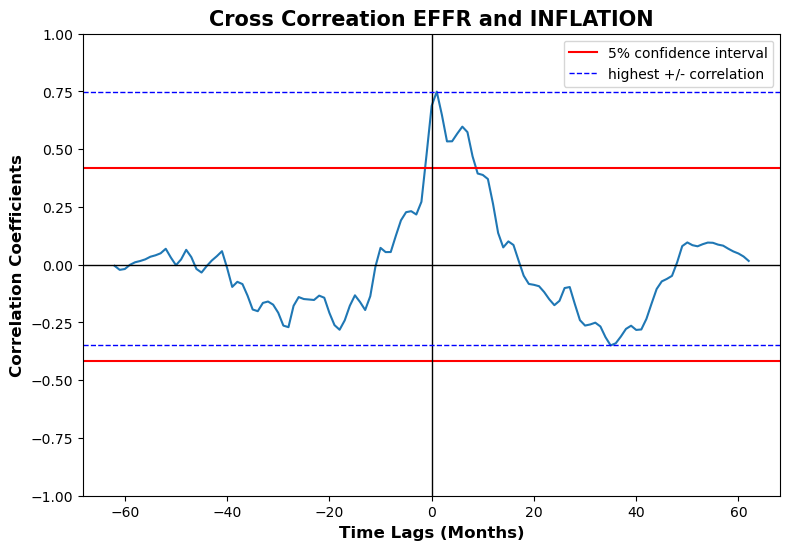

In [58]:
lags = signal.correlation_lags(len(merged['EFFR']), len(merged['INFLATION']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation EFFR and INFLATION', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags (Months)', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_effr_cpi)